In [1]:
import numpy as np
import pandas as pd
from utils.utils import PROJECT_DATA_DIR
import os
import mxnet as mx
import tarfile
import warnings
warnings.filterwarnings("ignore")

/Users/gusryd/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/gusryd/anaconda3/lib/python3.6/site-packages/urllib3/contrib/pyopenssl.py:46: DeprecationWarning: OpenSSL.rand is deprecated - you should use os.urandom instead
  import OpenSSL.SSL


In [2]:
sensor_train = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 
                                        'all_training_400_minisensor_1.csv'), 
                           sep='\s+', header=None)

sensor_test = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 
                                       'all_test_400_minisensor.csv'),
                          sep='\s+', header=None)

In [3]:
from sklearn.preprocessing import (MinMaxScaler,
                                   StandardScaler,
                                   Imputer,
                                   QuantileTransformer)

In [10]:
ytrain = sensor_train[sensor_train.columns[-1]]
#ytrain.head()
xtrain = sensor_train.drop(sensor_train.columns[-1], axis=1) 
ytest = sensor_test[sensor_test.columns[-1]]
xtest = sensor_test.drop(sensor_test.columns[-1], axis=1) 

In [11]:
import matplotlib.pyplot as plt

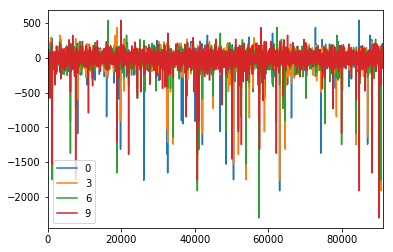

In [12]:
xtrain[xtrain.columns[0:10:3]].plot()
plt.show()

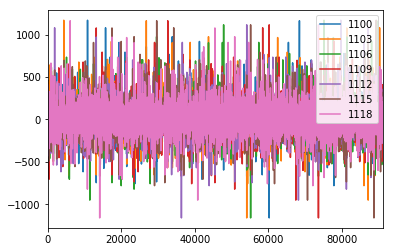

In [13]:
xtrain[xtrain.columns[1100:1120:3]].plot()
plt.show()

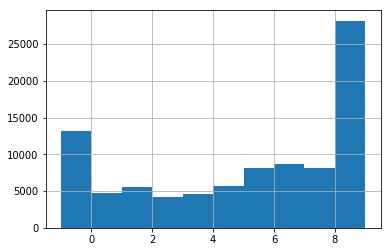

In [14]:
ytrain.hist()
plt.show()

In [15]:
scaler = StandardScaler()#QuantileTransformer(output_distribution='normal')
xtrain_sc = scaler.fit_transform(xtrain)
xtest_sc = scaler.transform(xtest)

In [18]:
xtrain.describe()

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
count,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,...,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000
mean,-0.148303,-0.084958,1.254369,-0.187906,-0.006333,1.236104,-0.169652,-0.041293,1.176655,-0.134264,...,1.176524,-0.145855,-0.018858,1.112937,-0.092213,-0.039427,1.077790,-0.040437,-0.056682,1.104759
std,27.286271,27.909568,46.855641,27.765273,28.559648,46.999119,28.626503,28.982204,46.765926,28.193874,...,46.367091,27.301695,27.251507,46.007632,27.150623,27.219451,46.120196,26.833842,26.793117,45.991891
min,-1914.000000,-1998.000000,-1160.000000,-1914.000000,-1998.000000,-1160.000000,-2305.000000,-1998.000000,-1160.000000,-2305.000000,...,-1160.000000,-1914.000000,-1998.000000,-1160.000000,-1914.000000,-1998.000000,-1160.000000,-2305.000000,-1998.000000,-950.000000
25%,-2.000000,-2.000000,-4.000000,-2.000000,-2.000000,-4.000000,-2.000000,-2.000000,-4.000000,-2.000000,...,-4.000000,-2.000000,-2.000000,-4.000000,-2.000000,-2.000000,-4.000000,-2.000000,-2.000000,-4.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,5.000000,3.000000,2.000000,5.000000,3.000000,2.000000,5.000000,3.000000,...,5.000000,3.000000,2.000000,5.000000,3.000000,2.000000,5.000000,3.000000,2.000000,5.000000
max,542.000000,2001.000000,1169.000000,438.000000,2054.000000,1169.000000,542.000000,2054.000000,1169.000000,542.000000,...,1169.000000,542.000000,2001.000000,1169.000000,542.000000,2054.000000,1169.000000,542.000000,2054.000000,1169.000000


In [29]:
from sklearn import linear_model

In [39]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [33]:
logreg = linear_model.LogisticRegression(C=1e5, multi_class='multinomial', solver='lbfgs')

In [34]:
logreg.fit(xtrain_sc, ytrain)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [37]:
pred_train = logreg.predict(xtrain_sc)
pred_test = logreg.predict(xtest_sc)
print(pred_test)
print('')
print('unique values train data set', np.unique(pred_train))
print('unique values test data set:', np.unique(pred_test))
print('')
print('training score:', f1_score(ytrain, pred_train, average=None))
print('test score:', f1_score(ytest, pred_test, average=None))

[8 2 5 ... 9 6 8]

unique values train data set [-1  0  1  2  3  4  5  6  7  8  9]
unique values test data set: [-1  0  1  2  3  4  5  6  7  8  9]

training score: [0.59308295 0.67800343 0.75634968 0.81129778 0.49028782 0.9144897
 0.84601788 0.8805333  0.99792278 0.97499253 0.96098217]
test score: [0.56668471 0.57142857 0.7404783  0.77382098 0.34482759 0.88266092
 0.83865616 0.84646321 0.99392762 0.96517413 0.93758242]


In [40]:
print(classification_report(ytest, pred_test))

             precision    recall  f1-score   support

         -1       0.68      0.49      0.57      3224
          0       0.70      0.48      0.57      1202
          1       0.63      0.90      0.74      1401
          2       0.82      0.73      0.77      1103
          3       0.57      0.25      0.34      1196
          4       0.80      0.98      0.88      1465
          5       0.73      0.99      0.84      2044
          6       0.87      0.83      0.85      2162
          7       0.99      1.00      0.99      2046
          8       0.94      0.99      0.97      4798
          9       0.88      1.00      0.94      2135

avg / total       0.81      0.82      0.80     22776



In [42]:
print(confusion_matrix(ytest, pred_test))

[[1570   67  701   90   26    1  658    9    2   92    8]
 [ 432  578    0   11   70   25    0   30    0    0   56]
 [   3    0 1254    0    5   63    0   15    0   61    0]
 [ 207    0    1  804    0    0    0    0   18   68    5]
 [  65  155   16    0  295  220   98  202    0   60   85]
 [   0    0    1    0   19 1433    0   12    0    0    0]
 [   7    0    0    0    0    0 2022    0    0   15    0]
 [   4   15   12   70   98   40    0 1789    5    2  127]
 [   0    0    0    0    0    0    0    0 2046    0    0]
 [  28    6    1    0    1    0    0    8    0 4753    1]
 [   1    0    0    0    1    0    0    0    0    0 2133]]


In [50]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

In [45]:
extra = ExtraTreesClassifier()

In [46]:
extra.fit(xtrain_sc, ytrain)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [49]:
pred_train = extra.predict(xtrain_sc)
pred_test = extra.predict(xtest_sc)
print(pred_test)
print('')
print('unique values train data set', np.unique(pred_train))
print('unique values test data set:', np.unique(pred_test))
print('')
print('training score:', f1_score(ytrain, pred_train, average=None))
print('test score:', f1_score(ytest, pred_test, average=None))
print(classification_report(ytest, pred_test))
print(confusion_matrix(ytest, pred_test))

[ 8 -1  5 ...  9  3  8]

unique values train data set [-1  0  1  2  3  4  5  6  7  8  9]
unique values test data set: [-1  0  1  2  3  4  5  6  7  8  9]

training score: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
test score: [0.55532171 0.74130241 0.47431507 0.85131691 0.76425685 0.84232804
 0.83233676 0.95817669 0.95134601 0.90082562 0.78177238]
             precision    recall  f1-score   support

         -1       0.54      0.57      0.56      3224
          0       0.80      0.69      0.74      1202
          1       0.59      0.40      0.47      1401
          2       0.80      0.91      0.85      1103
          3       0.83      0.71      0.76      1196
          4       0.87      0.82      0.84      1465
          5       0.81      0.85      0.83      2044
          6       0.97      0.94      0.96      2162
          7       0.96      0.94      0.95      2046
          8       0.86      0.94      0.90      4798
          9       0.76      0.80      0.78      2135

avg / total       0.8

In [51]:
random = RandomForestClassifier()

In [52]:
random.fit(xtrain_sc, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
pred_train = random.predict(xtrain_sc)
pred_test = random.predict(xtest_sc)
print(pred_test)
print('')
print('unique values train data set', np.unique(pred_train))
print('unique values test data set:', np.unique(pred_test))
print('')
print('training score:', f1_score(ytrain, pred_train, average=None))
print('test score:', f1_score(ytest, pred_test, average=None))
print(classification_report(ytest, pred_test))
print(confusion_matrix(ytest, pred_test))

[ 8  6  5 ... -1  3  8]

unique values train data set [-1  0  1  2  3  4  5  6  7  8  9]
unique values test data set: [-1  0  1  2  3  4  5  6  7  8  9]

training score: [0.99606031 0.9957347  0.99754791 0.99833294 0.99826163 0.99965078
 0.99883785 0.99982694 1.         0.99954075 0.99749315]
test score: [0.55393338 0.57397004 0.48090642 0.76488752 0.66082949 0.85815102
 0.87853176 0.95738168 0.96057525 0.91438356 0.78155117]
             precision    recall  f1-score   support

         -1       0.51      0.61      0.55      3224
          0       0.66      0.51      0.57      1202
          1       0.58      0.41      0.48      1401
          2       0.74      0.79      0.76      1103
          3       0.74      0.60      0.66      1196
          4       0.89      0.83      0.86      1465
          5       0.87      0.89      0.88      2044
          6       0.98      0.94      0.96      2162
          7       0.97      0.95      0.96      2046
          8       0.88      0.95      0